<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-训练并可视化决策树" data-toc-modified-id="1.-训练并可视化决策树-1">1. 训练并可视化决策树</a></span></li><li><span><a href="#2.-利用决策树做预测" data-toc-modified-id="2.-利用决策树做预测-2">2. 利用决策树做预测</a></span></li><li><span><a href="#3.-估算类的概率（Estimate--Class-Probabilities）" data-toc-modified-id="3.-估算类的概率（Estimate--Class-Probabilities）-3">3. 估算类的概率（Estimate  Class Probabilities）</a></span></li><li><span><a href="#4.-CART-训练算法" data-toc-modified-id="4.-CART-训练算法-4">4. CART 训练算法</a></span><ul class="toc-item"><li><span><a href="#4.1-分类任务" data-toc-modified-id="4.1-分类任务-4.1">4.1 分类任务</a></span></li><li><span><a href="#4.2-回归任务" data-toc-modified-id="4.2-回归任务-4.2">4.2 回归任务</a></span></li></ul></li><li><span><a href="#5.-计算复杂度（Computational-Complexity）" data-toc-modified-id="5.-计算复杂度（Computational-Complexity）-5">5. 计算复杂度（Computational Complexity）</a></span></li><li><span><a href="#6.-正则化参数（Regularization-Hyperparameters）" data-toc-modified-id="6.-正则化参数（Regularization-Hyperparameters）-6">6. 正则化参数（Regularization Hyperparameters）</a></span></li><li><span><a href="#7.-不稳定性（Instability）" data-toc-modified-id="7.-不稳定性（Instability）-7">7. 不稳定性（Instability）</a></span></li><li><span><a href="#8.-多输出问题（Multi-output-Problems）" data-toc-modified-id="8.-多输出问题（Multi-output-Problems）-8">8. 多输出问题（Multi-output Problems）</a></span></li><li><span><a href="#9.-决策树的使用建议" data-toc-modified-id="9.-决策树的使用建议-9">9. 决策树的使用建议</a></span></li></ul></div>

- DTs 既适用于【分类】，也适用于【回归】任务。

- DTs 是 powerful 的算法，能够 fit 复杂的数据集。

- DTs 是随机森林（Random Forests）的基本组成（fundamental components）。


这里的主要内容：

- 讨论如何训练、可视化以及如何用 DTs 进行预测；

- 介绍 Scikit-Learn 使用的 CART 算法

- 讨论如何 regularize trees 并将他们用于回归任务

- 讨论 DTs 的一些限制（limitations）

In [1]:
# Common imports
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn


%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

np.random.seed(42)
# Display all the estimator's all parameters when print estimator
# True: only display the non-default values
sklearn.set_config(print_changed_only=False)
# warnings.filterwarnings(action='ignore', message="^internal gelsd")

print('Version of Python:', sys.version)
print('Version of pandas:', pd.__version__)
print('Version of Scikit-Learn:', sklearn.__version__)

Version of Python: 3.6.10 |Anaconda, Inc.| (default, May  8 2020, 02:54:21) 
[GCC 7.3.0]
Version of pandas: 1.1.5
Version of Scikit-Learn: 0.24.1


# 1. 训练并可视化决策树

In [2]:
from sklearn.datasets import load_iris


iris = load_iris()
X = iris['data'][:, 2:]  # 花瓣长度和宽度
y = iris['target']

X.shape, y.shape

((150, 2), (150,))

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# 训练决策树
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

<div class ="alert alert-block alert-info">
    <b>决策树一个优点是，仅需要非常少的数据准备（data preparation），根本不需要 feature scaling 和 feature centering。</b>
</div>

**<font color='crimson'>树的可视化方法1</font>**——使用 **`sklearn.tree.plot_tree`**。这个可视化会自动适应（fit）axis 的大小。使用 `plt.figure` 的 `figsize` 或 `dpi` 参数来控制 rendering 的大小。

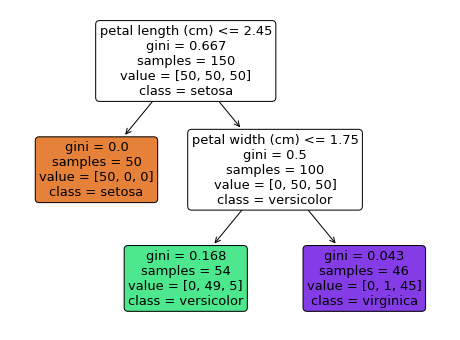

In [5]:
from sklearn.tree import plot_tree


plt.figure(figsize=(8, 6))
plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    # 给叶子节点加上颜色，用来区分
    filled=True,
    # 圆角框框，并使用 Helvetica 字体
    # 否则（False），是直角框框，并且是 Times-Roman 字体
    rounded=True
)
plt.show()

**<font color='crimson'>树的可视化方法2</font>**——使用 `sklearn.tree.export_graphviz` 将树 export 成 [Graphviz](https://www.graphviz.org/) 格式。

In [6]:
import graphviz
from sklearn.tree import export_graphviz

In [7]:
# 结果存在 PDF 文件中
dot_data = export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

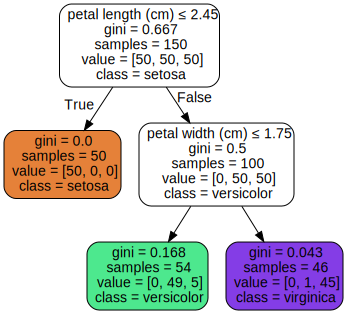

In [8]:
# 也可以弄得美观一点
dot_data = export_graphviz(tree_clf, out_file=None, 
                     feature_names=iris.feature_names[2:],  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

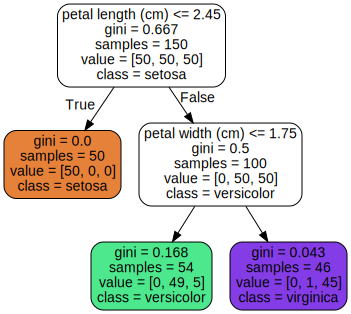

In [9]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graphviz.Source.from_file("iris_tree.dot")

**<font color='crimson'>树的可视化方法3</font>**——使用 `sklearn.tree.export_text` 将导出成文本格式（export_text）。

In [10]:
from sklearn.tree import export_text


# Text summary of all the rules in the decision tree
report = export_text(tree_clf, feature_names=iris.feature_names[2:])
print(report)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



# 2. 利用决策树做预测

**<font color='blue'>过程：</font>**

从**根节点（root node）**（depth=0，在顶部）开始——判断「花瓣长度」（petal length）是否 <= 2.45 厘米。

- 如果是，会走到根节点的左子节点（depth=1，左侧），这是一个**叶子节点（leaf node）**（不含任何子节点），所以只需要查看该叶子节点预测的类别，预测结果是 *Iris setosa*。


- 如果「花瓣长度」 > 2.45 厘米的话，会走到根节点的右子节点（depth=1，右侧），该节点不是叶子节点，所以需要判断「花瓣宽度」是否 <= 1.75 厘米。

  - 如果是，走到子节点（depth=2，左侧），这是一个叶子节点，会做预测，预测结果为 *Iris versicolor*。
  
  - 如果「花瓣宽度」 > 1.75 厘米，会走到右子节点（depth=2，右侧），这也是一个叶子节点，预测结果为 *Iris virginica*。
  
**<font color='blue'>节点中的属性：</font>**

- **samples**：表示适用于该节点的训练样本数量。比如，有 100 个训练样本的「花瓣长度」 >2.45 厘米，其中 54 个训练样本的「花瓣宽度」 <= 1.75 厘米。


- **values**：表示适用于该节点中的每个类别对应的训练样本数量。比如，最右下的叶子节点（紫色）中，类别为 *Iris setosa* 的训练样本有 0 个，类别为 *Iris versicolor* 的训练样本有 1 个，类别为 *Iris virginica* 的训练样本有 45 个。


- **gini**：表示该节点的纯度（impurity）。当该节点中所有样本都属于同一个类别时，那么该节点是一个 “pure” （gini=0）节点。比如，上图的中黄色节点，该节点中的 50 个训练样本都属于 *Iris setosa* 这个类别，所以 gini=0。


**<font color='red'>Gini impurity:</font>**

$$G=1-\sum^n_{k=1}p_k^2$$

其中，$p_k$ 表示该节点中各类别（k）的占比。

如，绿色节点中

In [11]:
gini = 1 - (0/54)**2 - (49/54)**2 - (5/54)**2
gini

0.1680384087791495

<div class ="alert alert-block alert-info">
<b>Scikit-Learn 使用的是 CART 算法，只会生成二叉树（binary trees）——非叶子节点总是有 2 个孩子（子节点）（即，总是做“是/否”的判断）。其他算法（ID3 和 C4.5）生成的决策树中的节点可以有 2 个以上的子节点。</b>
</div>

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
# 决策树的 decision boundaries
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 1000),
        np.linspace(y_min, y_max, 1000))

    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = clf.predict(X_new).reshape(xx.shape)
    
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(xx, yy, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label=iris.target_names[0])
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label=iris.target_names[1])    
    plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], 'g^', label=iris.target_names[2])    
    
    plt.xlabel('Petal length (cm)', fontsize=14)
    plt.ylabel('Petal width (cm)', fontsize=14)
    plt.legend(fontsize=16)

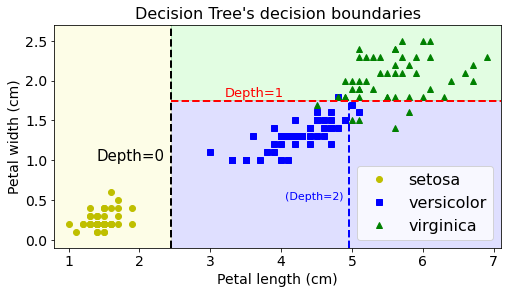

In [14]:
plt.figure(figsize=(8, 4.1))
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree's decision boundaries", fontsize=16)

plt.plot([2.45, 2.45], [X[:, 1].min()-0.2, X[:, 1].max()+0.2], 'k--', linewidth=2)
plt.plot([2.45, X[:, 0].max()+0.2], [1.75, 1.75], 'r--', linewidth=2)
plt.plot([4.95, 4.95], [X[:, 1].min()-0.2, 1.75], c='b', ls='--', lw=2)
plt.text(1.40, 1.0, 'Depth=0', color='k', fontsize=15)
plt.text(3.2, 1.80, 'Depth=1', color='r', fontsize=13)
plt.text(4.05, 0.5, '(Depth=2)', color='b', fontsize=11)

plt.show()

上图展示了决策树的 decision boundaries。

<div class="alert alert-block alert-danger">
    <center><b>模型解释性（Model interpretation）——黑盒 vs 白盒</b></center>
    <br>
    决策树是直观的（intuitive），所做的决策很容易解释。这种模型称之为<b>白盒模型（white box models）</b>，而随机森林和神经网络通常被认为是<b>黑盒模型（black box models）</b>。黑盒模型的预测准确度很好，可以很容易 check 做出决策的计算，但是，通常很难用简单的术语解释为什么做出这些决策。
</div>

# 3. 估算类的概率（Estimate  Class Probabilities）

决策树可以估计某个样本属于特定类 k 的概率：

1. 找到该样本所属的叶子结点；

2. 返回该叶子结点中属于类别 k 的训练样本比例。

In [15]:
tree_clf.predict_proba([
    [6, 1.5],
    [6.5, 1.0]
])

array([[0.        , 0.90740741, 0.09259259],
       [0.        , 0.90740741, 0.09259259]])

In [16]:
tree_clf.predict([
    [6, 1.5],
    [6.5, 1.0]
])

array([1, 1])

上图中，在右下角矩形中，任意点的估计概率（estimated probabilities）都是相同的。

# 4. CART 训练算法

Scikit-Learn 使用的 **<font color='blue'>Classification and Regression Tree (CART)</font>** 算法来训练决策树（也称为 **<font color='blue'>"growing trees"</font>**）。既可以用于分类，也可以用回归任务。

**算法的工作原理是：递归地使用单个特征 k 和阈值 $t_k$ 将训练集分成两部分（最终生成一个二叉树），直至树达到最大深度（由 `max_depth` 定义）或者找不到切分点（特征 k 和阈值）。**

如何选择特征 k 和阈值 $t_k$ 呢？搜索找到使得子集最纯（purest）的 $(k, t_k)$，即，相同的类或相似的特征值在一个节点中。

以下是**<font color='crimson'>用于最小化的损失函数</font>**：

$$J(k, t_k)=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$$

其中，$G_{left}$ 和 $G_{right}$ 分别用于衡量左子集和右子集的 impurity，$m_{left}$ 和 $m_{right}$ 分别表示左子集（$\{(x, y)|x_j <= t_k\}$）和右子集（$\{(x, y)|x_j > t_k\}$）中的样本数。



<div class="alert alert-block alert-info">
    <b>CART 是一个贪婪算法（greedy algorithm）</b>——在最顶层搜索出最优分裂，然后在每层都重复这个过程。它不会去检查这种 split 方法在几层之后是否会产生最小的 impurity。<b>贪婪算法通常产生一个相当不错的解决方案，但不能保证是最优解。</b><br><br>
    寻找最优树通常是一个 NP 完成问题（NP- Complete problem）：需要的时间 $O(exp(m))$，所以即使是很小的训练集，也相当麻烦（intractable）。这是我们为什么勉强接受（settle for）一个 "reasonably good" 解的原因。
</div>

## 4.1 分类任务

如果是一个分类任务，节点中（有 m 个样本）有 k 个类别，那么 

$$p_k=\frac{1}{m}\sum_{y\in G}(y=k)$$

表示节点中每个类别的样本比例。

计算节点 impurity 的方法有：

- **<font color='blue'>Gini</font>**——Sklearn 的默认参数。

$$G=\sum_k p_k(1-p_k)=1-\sum_kp_k^2$$


- **<font color='blue'>Entropy</font>**——sklearn 的可选参数（`criterion='entropy'`）。

$$G=-\sum_k p_klog(p_k)$$


- **<font color='blue'>Misclassification</font>**

$$G=1-max({p_k})$$


以上均满足：

- 越大，样本集合的不确定性越大

- 只依赖与分布，与值无关

- 取值越多越大，在 $p_k=\frac{1}{n}$ 时最大。如果只有一个类别，那么值为 0。

<div class="alert alert-block alert-info">
    <center><b>选择 Gini 还是 Entropy 呢？</b></center><br>
    多数情况下，两者没有什么区别，产生的树都很相似。Gini 的计算速度要略快一点，所以是个不错的默认选择。但是，Gini 倾向于将最常见的类别分到 branch 中（isolate the most frequent class in its own branch of the tree），而 Entropy 倾向于选择更加平衡的树。
</div>

In [17]:
X_all = iris['data']
y_all = iris.target

X_all.shape, y_all.shape

((150, 4), (150,))

In [18]:
gini_tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree_clf.fit(X_all, y_all)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

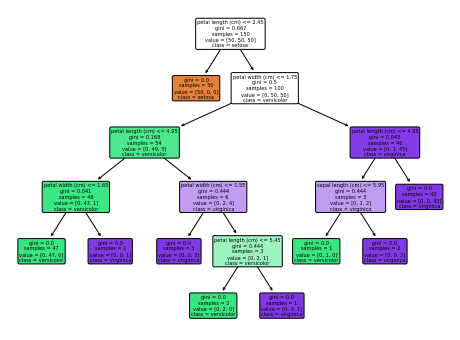

In [19]:
plt.figure(figsize=(8, 6))
plot_tree(
    gini_tree_clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True)
plt.show()

In [20]:
entropy_tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree_clf.fit(X_all, y_all)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

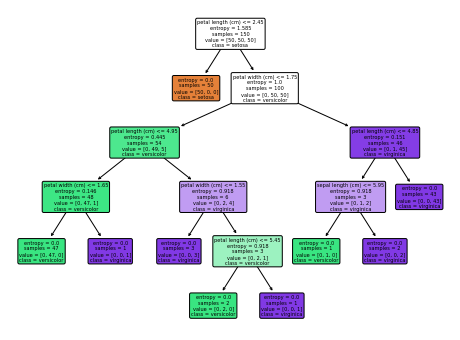

In [21]:
plt.figure(figsize=(8, 6))
plot_tree(
    entropy_tree_clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True)
plt.show()

## 4.2 回归任务

In [22]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X_reg = np.random.rand(m, 1)
y_reg = 4 * (X_reg - 0.5) ** 2
y_reg = y_reg + np.random.randn(m, 1) / 10

In [23]:
# float point values instead of integer values
y_reg[:3]

array([[-0.00504175],
       [ 0.83579891],
       [ 0.244592  ]])

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
tree_reg = DecisionTreeRegressor(
    criterion='mse',   # default
    max_depth=2, random_state=42)
tree_reg.fit(X_reg, y_reg)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, random_state=42,
                      splitter='best')

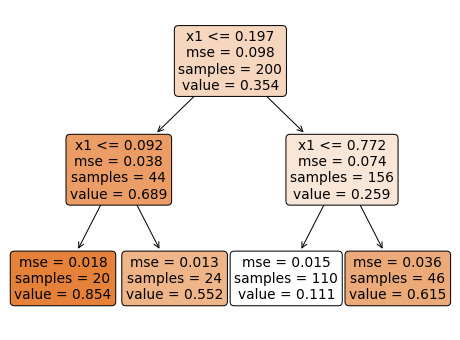

In [26]:
plt.figure(figsize=(8, 6))
plot_tree(
    tree_reg,
    feature_names=['x1'],
    filled=True,
    rounded=True)
plt.show()

与分类任务的主要区别是，在每个结点中预测值，而不是预测类别。

如，某个样本 x1=0.6，从根结点开始遍历（transpose），最终在叶子结点（白色，depth=3，右2）中预测是 0.111。这个预测值是该叶子结点中 110 个训练样本的target 的平均值，并且在这 110 个训练样本上的 MSE 是 0.015。

In [27]:
def plot_regression_predictions(tree_reg, X, y):
    X_new = np.linspace(X.min()-0.2, X.max()+0.2, 1000).reshape(-1, 1)
    y_pred_new = tree_reg.predict(X_new)

    plt.plot(X, y, 'b.')
    plt.plot(X_new, y_pred_new, 'r.-', lw=2, label='$\hat{y}$')
    plt.legend(fontsize=16)
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$y$', fontsize=16, rotation=0)

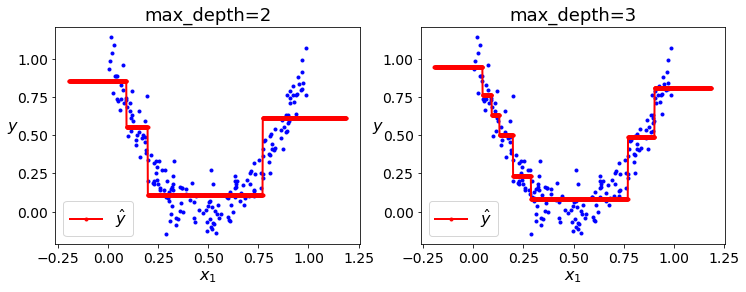

In [28]:
tree_reg_1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_1.fit(X_reg, y_reg)
tree_reg_2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_2.fit(X_reg, y_reg)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg_1, X_reg, y_reg)
plt.title("max_depth=2", fontsize=18)

plt.subplot(122)
plot_regression_predictions(tree_reg_2, X_reg, y_reg)
plt.title("max_depth=3", fontsize=18)

plt.show()

如上图，每个区域（region）内的预测值总是等于该区域内训练样本的 target 的平均值。算法切分每个区域的方法是使得尽可能多的训练样本的 target 接近于这个值。

在回归任务中，CART 算法不再以尝试最小化 impurity 的方式来切分数据集，而是以最小化 MSE（默认值）的方式。

除了 MSE 还可以是

- **<font color='blue'>MSE (Mean Squared Error) (or, L2 error)</font>**——Sklearn 的默认参数。

$$G=\frac{1}{m}\sum_{y\in G}(y-\hat{y_m})^2$$

其中，$\hat{y_m} = \frac{1}{m}\sum_{y\in G}{y}$ 是结点内所有样本 target 的平均值。


- **<font color='blue'>Half Poisson deviance</font>**——`criterion='poisson'` 在 target 是 count 或者 freq 时可能是一个 good choice。任何情况下，**y>0 是必要条件**。比 MSE 要慢得多。

$$G=\frac{1}{m}\sum_{y\in G}(ylog{\frac{y}{\hat{y_m}}}-y+\hat{y_m})^2$$


- **<font color='blue'>MAE (Mean Absolute Error)</font>**——比 MSE 要慢得多。

$$G=\frac{1}{m}\sum_{y \in G}|y-median(y)_m|$$

其中，$median(y)_m=median_{y\in G}(y)$ 是结点内所有样本 target 的中位数。

和分类任务一样，决策树用于回归时也容易出现过拟合现象。

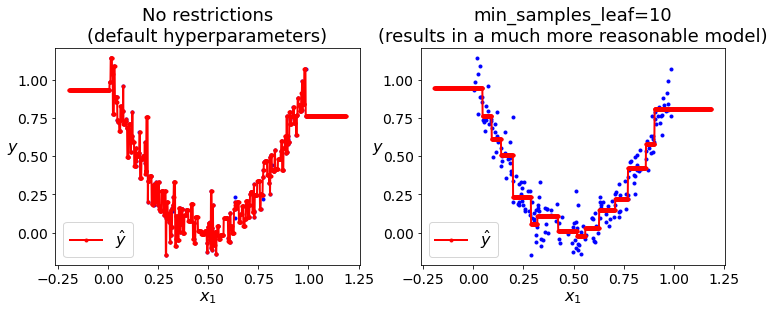

In [29]:
# Train a DT regressor without restrictions
tree_reg_1 = DecisionTreeRegressor(random_state=42)
tree_reg_1.fit(X_reg, y_reg)
# Train a DT regressor with `min_samples_leaf` set to 10
tree_reg_2 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg_2.fit(X_reg, y_reg)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg_1, X_reg, y_reg)
plt.title("No restrictions\n(default hyperparameters)", fontsize=18)

plt.subplot(122)
plot_regression_predictions(tree_reg_2, X_reg, y_reg)
plt.title("min_samples_leaf=10\n(results in a much more reasonable model)", fontsize=18)

# plt.subplots_adjust(wspace=0.4)
plt.show()

# 5. 计算复杂度（Computational Complexity）

m 表示样本数量，n 表示特征数量。

- **<font color='crimson'>预测时：</font>** 进行预测的时候通常需要从根结点开始遍历决策树（直到叶子结点）。决策树通常近似平衡二叉树（但通常不是平衡二叉树），所以遍历（traverse）决策树大约需要经过 $O(log_2(m)$ 个结点。由于在每个结点仅需要检查一个特征值，因此**<font color='crimson'>总体预测复杂度为 $O(log_2(m))$，与特征数量无关</font>**。 所以，在处理大型数据集时，预测也很快。


- **<font color='crimson'>训练时：</font>** 在每个结点都要遍历所有特征（如果设置了 `max_features` 则会少点）来找到使得 entropy 最大程度降低的特征。比较每个结点上所有样本的所有特征会导致训练复杂度为 $O(nmlog_2(m)$。对于小训练集（少于几千个样本），Scikit-Learn 可以通过对数据进行预排序（`presort=True`）来加快训练速度，但是这样做会大大降低大训练集的训练速度。

# 6. 正则化参数（Regularization Hyperparameters）

**决策树对训练数据做出的假设很少（very few assumptions）**，与线性模型（linear models）相反，线性模型假设训练数据是线性的（linear）。因此，**如果不加以限制，树的结构随着训练集变化，非常拟合训练集（adapt itself to the training set, fitting it very closely），并且非常容易过拟合。**

这种模型称之为 **<font color='blue'>非参数模型（nonparametric model）</font>** ，这不是说模型不包含任何参数（事实上通常含有很多参数），而是在训练之前参数的数量没有确定下来，所以这就导致模型非常拟合数据集（free to stick closely to the data）。相反，**<font color='blue'>参数模型（parametric model）</font>**，如线性模型，参数数量已经事先确定（has a predetermined number of parameters），所以其自由度（degree of freedom）是受限的，从而降低了过拟合的风险（但增加了欠拟合的风险）。

为了避免对训练集过拟合，需要在训练过程中限制决策树的自由度。这称为 **<font color='blue'>正则化（regularization）</font>**。正则化参数取决于使用的模型，但通常来说，至少可以限制决策树的最大深度。

- **`max_depth`**：控制决策树的最大深度（默认为 `None`，即无限制）。**减少 `max_depth` 会 regularize 模型，从而降低过拟合的风险。**


- **max_leaf_nodes**：叶子结点的的最大数量（默认为 `None`，即无限制）。**减少 `max_leaf_nodes` 会 regularize 模型，从而降低过拟合的风险。**


- **max_features**：在 split 每个结点时，需要考虑的最大特征数。

  - `None`: 默认值，即 `max_features=n_features`
  
  - int: 即 `max_features`
  
  - float: 即 `int(max_features*n_features)`
  
  - `'auto'`: 即 `max_features=n_features`
  
  - `'sqrt'`: 即 `max_features=sqrt(n_features)`
  
  - `'log2'`: 即 `max_features=log2(n_features)`


- **min_samples_split**：结点必须至少含有这么多样本才能继续 split。默认为 2。


- **min_samples_leaf**：每个叶子结点必须含有这么多样本数量。默认为 1。所以在结点 split 时，必须要考虑 split 之后，左右子结点是否至少包含这么多样本。**可能具有平滑模型的效果（smooth the model），特别是在回归任务中。**


- **min_weight_fraction_leaf**：和 min_samples_leaf 类似，但表现在 sample weight 上。默认为 0。

**<font color='crimson' size=2>增加 `min_*` 超参数，或者减少 `max_*` 超参数都会 regularize 模型。</font>**


<div class="alert alert-block alert-info">
    <b>其他算法在训练决策树时不作任何限制，然后再剪去（删除）不必要的结点。</b>如果一个节点的所有子节点都是叶子结点，并且该结点对于纯度提升（purity improvement）在统计意义上不显著，那么该结点可以认为是非必要的。标准统计检验（standard statistical test）（如，$\chi^2$ 检验）用来估计“提升纯属于巧合”（称之为零假设，null hypothesis）的概率。如果这个概率（p-value）高于给定阈值（通常是 5%，是个超参数），那么这个节点被认为是非必要的，并且其子节点也可以被删除。剪枝过程直到所有非必要节点都被剪去为止。
</div>

In [30]:
def plot_decision_boundary_2(clf, X, y):
    x_min, x_max = X[:, 0].min()-0.2, X[:, 0].max()+0.2
    y_min, y_max = X[:, 1].min()-0.2, X[:, 1].max()+0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = clf.predict(X_new).reshape(xx.shape)

    custom_cmap = ListedColormap(['#fafab0', '#a0faa0'])
    plt.contourf(xx, yy, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')

    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)

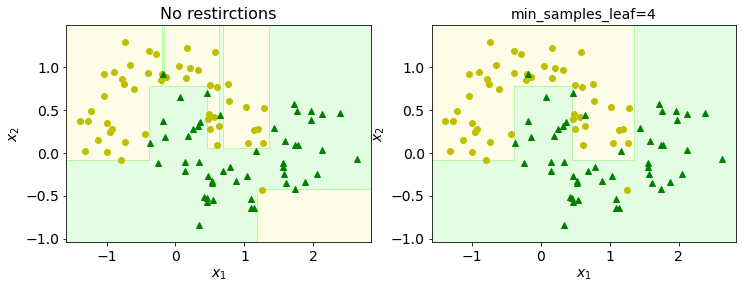

In [31]:
# Example
from sklearn.datasets import make_moons


Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# No restrictions
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf1.fit(Xm, ym)
# A leaf node must have 4 instances
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf2.fit(Xm, ym)

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_decision_boundary_2(deep_tree_clf1, Xm, ym)
plt.title("No restirctions", fontsize=16)

plt.subplot(122)
plot_decision_boundary_2(deep_tree_clf2, Xm, ym)
plt.title("min_samples_leaf=4", fontsize=14)
plt.show()

可以看出，不作限制（左图）的模型过拟合；做了限制的模型（叶子结点最少样本数是 4，右图）可能泛化效果更好。

# 7. 不稳定性（Instability）

通过以上的结果可以看出，<font color='crimson'>决策树喜欢正交的决策边界（orthogonal decision boundary）</font>——所有的 split 都垂直于轴，这就**<font color='crimson'>使得决策树对训练集的 rotation 比较敏感</font>**。

如下图，训练集是一个线性可分的（linearly separable）。左图中，DT 可以轻松地划分数据集；但在右图中，数据集选择 45 度后，decision boundary 看起来是没有必要的复杂。虽然 2 个模型都完美地拟合了训练集，但右侧的模型很可能泛化效果较差。

**<font color='crimson'>解决此问题的一个办法是使用主成分分析（Principal Component Analysis, PCA），这通常会形成一个 orientation (方向) 更好的训练集。</font>**

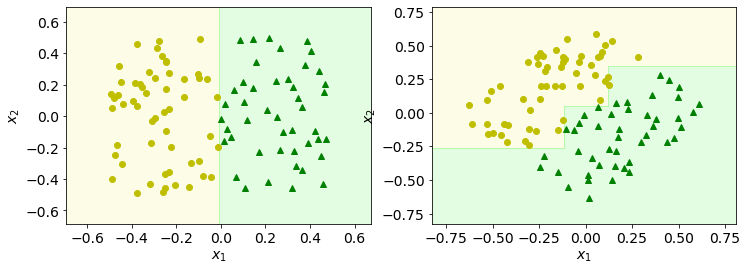

In [32]:
# Example
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32)

# Rotate the dataset by 45°
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

# Train DTs
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_decision_boundary_2(tree_clf_s, Xs, ys)

plt.subplot(122)
plot_decision_boundary_2(tree_clf_sr, Xsr, ys)

plt.show()

更一般的来说，**<font color='crimson'>决策树的主要问题是对训练集的微小变化（small variants）非常敏感</font>**。

如，在 iris 数据集上移除指定样本后，会得到完成不同的 decision boundary。即使是相同的数据集，由于 Sklearn 使用的算法中的随机性，也可能会得到不同的模型，除非指定 `random_state`。

Scikit-Learn 中的 **`random_state`** 控制模型的随机性（randomness）。

- 在每一个 split 中，特征的顺序是随机的，即使是 `splitter='best'`。


- 当 `max_features < n_features` 时，在每个 split 中，算法会随机选择 `max_features` 个特征。


- 即使 `max_features = n_features` 时，最佳的切分点可能也不同。因为如果不同的切分点带来的 impurity improvement 都是最大且相同，那么切分点是随机选择的。

**<font color='crimson'>随机森林（Random Forests）可以通过对许多决策树预测进行平均来限制这种不稳定性。</font>**

In [33]:
# iris 数据集
iris = load_iris()
X = iris['data'][:, 2:]  # 花瓣长度和宽度
y = iris['target']

X.shape, y.shape

((150, 2), (150,))

In [34]:
# 原始数据集
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

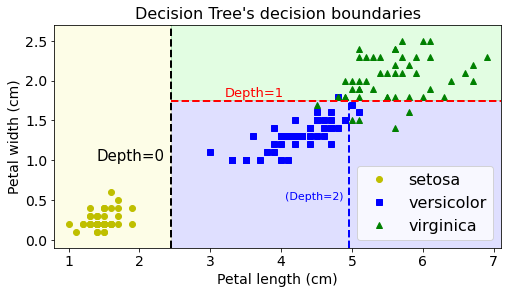

In [35]:
plt.figure(figsize=(8, 4.1))
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree's decision boundaries", fontsize=16)

plt.plot([2.45, 2.45], [X[:, 1].min()-0.2, X[:, 1].max()+0.2], 'k--', linewidth=2)
plt.plot([2.45, X[:, 0].max()+0.2], [1.75, 1.75], 'r--', linewidth=2)
plt.plot([4.95, 4.95], [X[:, 1].min()-0.2, 1.75], c='b', ls='--', lw=2)
plt.text(1.40, 1.0, 'Depth=0', color='k', fontsize=15)
plt.text(3.2, 1.80, 'Depth=1', color='r', fontsize=13)
plt.text(4.05, 0.5, '(Depth=2)', color='b', fontsize=11)

plt.show()

In [36]:
# 在 iris 数据集中移除指定样本
X_widest_versicolor = X[(X[:, 1] == X[:, 1][y == 1].max()) & (y == 1)]
X_widest_versicolor

array([[4.8, 1.8]])

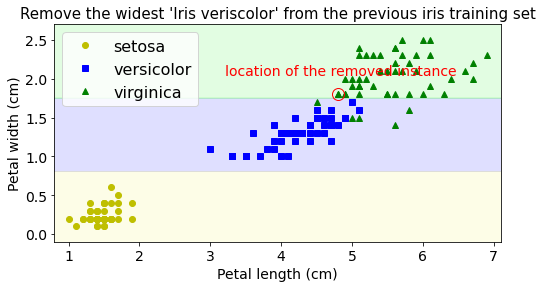

In [37]:
# 移除指定样本后重新训练决策树模型
not_widest_versicolor = (X[:, 1] != 1.8) | (y == 2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked)
plt.plot(X_widest_versicolor[:, 0], X_widest_versicolor[:, 1],
         marker='o', markerfacecolor='none', markeredgecolor='r', markersize=12)
plt.text(3.2, 2.05, "location of the removed instance", color='r', fontsize=14)
plt.title("Remove the widest 'Iris veriscolor' from the "
          "previous iris training set", fontsize=15)
plt.show()

# 8. 多输出问题（Multi-output Problems）

此时 `Y` 是一个 2 维数组——`(n_samples, n_outputs)`。

当输出是不相关时（no correlation between the outputs），一个简单的方法是构建 n 个独立的模型（每个模型对应一个输出），然后使用这些模型来独立预测每一个输出。

然而，**<font color='crimson'>通常同一输入（X）的多个输出可能是相关的</font>**，所以一个更好的做法是**<font color='crimson'>只构建一个模型来同时预测所有的输出</font>**。这样的好处是，训练时间更少（只构建一个模型）；模型的泛化准确度（accuracy）可能更高。

对于决策树，这种策略可以很容易使用。只需要以下变化：

- 在叶子结点中存储 n 个输出，而不是 1 个；

- 在 split 的时候，使用在所有输出上的 average reduction 作为切分准则。

`DecisionTreeClassifier` 和 `DecisionTreeRegressor` 对于多输出问题，均实现了这一策略。模型将会

- 使用 `predict` 的时候将会输出 n 个值;

- 使用 `predict_proba` 的时候，将会输出每个输出的概率。

<br>

**例子：**

In [38]:
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

X.shape, y.shape

((100, 1), (100, 2))

In [39]:
X[:5]

array([[-99.97712504],
       [-99.42593459],
       [-96.34234453],
       [-96.12660843],
       [-94.52248136]])

In [40]:
y[:5]

array([[ 1.82569761,  2.64490159],
       [ 2.80694332,  1.41091233],
       [-2.72043225, -1.57125834],
       [-2.99372396, -0.95248164],
       [-0.85218806,  3.02380223]])

In [41]:
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, random_state=None,
                      splitter='best')

In [42]:
regr_1.n_outputs_

2

In [43]:
X_test = np.arange(-100, 100, 0.01)[:, np.newaxis]
regr_1.predict(X_test)

array([[ 1.82569761,  2.64490159],
       [ 1.82569761,  2.64490159],
       [ 1.82569761,  2.64490159],
       ...,
       [-1.0611654 , -0.2509871 ],
       [-1.0611654 , -0.2509871 ],
       [-1.0611654 , -0.2509871 ]])

# 9. 决策树的使用建议

https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use